<a href="https://colab.research.google.com/github/WesDavi/Analise_de_casos_de_suicidio_com_ML_Regressao_Linear/blob/main/Analise_Casos_Suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de casos de Suicídio em todo mundo de 1985 à 2016 e previsão dos casos usando Machine Learning (ML)**

In [ ]:
#importando as bibliotecas necessárias para programar os códigos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1º Passo: Pré-processamento de dados

In [ ]:
#leitura do arquivo dataset usando pandas

df = pd.read_csv('/content/drive/MyDrive/Datasets/master.csv')

In [ ]:
#Exibe cabeçalho do dataset

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#exibição das colunas existentes no dataset
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
#tamanho das colunas existentes no dataset
df.shape

(27820, 12)

In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
#exclui colunas que não serão usadas e que não são úteis para o entendimento

df=df.drop(['country-year', 'HDI for year'], axis=1)

In [ ]:
#renomeia nome das colunas para facilitar o entendimento

df.columns=('País', 'Ano', 'Sexo', 'Idade', 'Suicídio', 'População', 'S p/ 100k H', 'PIB-Ano', 'Per capta', 'Geração')

In [ ]:
#dataset alterado
df.head()

,País,Ano,Sexo,Idade,Suicídio,População,S p/ 100k H,PIB-Ano,Per capta,Geração
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [ ]:
#exibição das colunas após a mudança do nome das mesmas e exclusão das colunas que não são importantes para o tratamento de dados
df.columns

Index(['País', 'Ano', 'Sexo', 'Idade', 'Suicídio', 'População', 'S p/ 100k H',
       'PIB-Ano', 'Per capta', 'Geração'],
      dtype='object')

In [ ]:
df.describe()

,Ano,Suicídio,População,S p/ 100k H,Per capta
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [ ]:
df['País'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
#isnull().sum() faz a soma de todos os elementos nulos dentro das colunas, podemos ver o resultado abaixo

df.isnull().sum()

País           0
Ano            0
Sexo           0
Idade          0
Suicídio       0
População      0
S p/ 100k H    0
PIB-Ano        0
Per capta      0
Geração        0
dtype: int64

# 2º Passo: Usando técnicas de consulta, Estatísticas e Visualização para obtermos um melhor visualização dos dados.

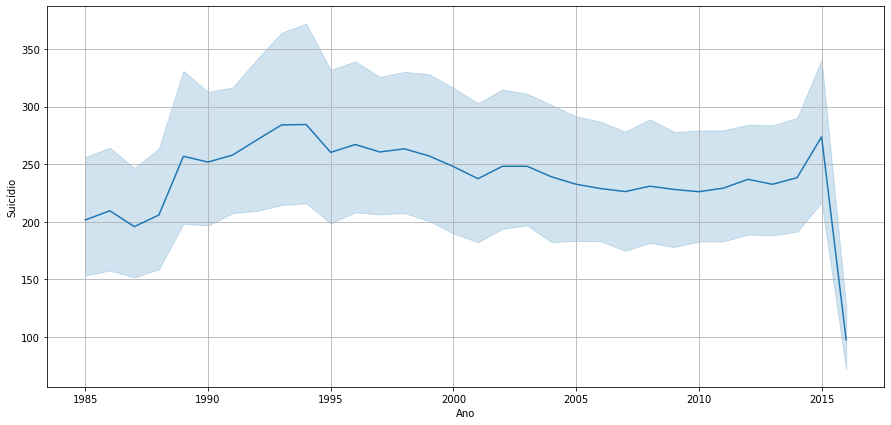

In [ ]:
# O primeiro gráfico utilizado é um simples gráfico de linhas, mas que nos traz
# a visão privilegiada dos dados. É possível entender a evolução dos casos de
# suicídio desde 1985 até 2016.

plt.figure(figsize=(15,7))
sns.lineplot(x=df['Ano'], y=df['Suicídio'], data=df)
plt.grid('true')

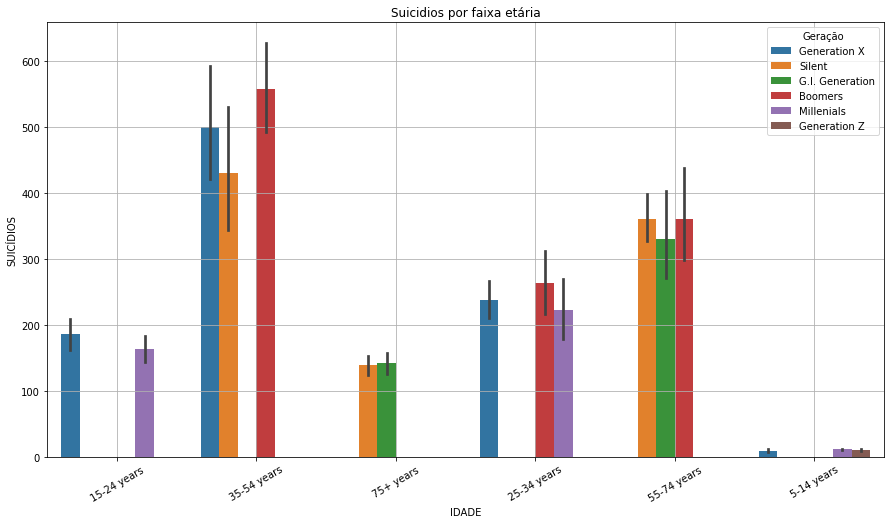

In [ ]:
# O gráfico a seguir mostra os casso de suicídio por faixa etária (idade) e qual a geração

plt.figure(figsize=(15,8))
sns.barplot(x = df['Idade'], y=df['Suicídio'], hue=df['Geração'], data=df.groupby(["Idade","Sexo"]).sum().reset_index()).set_title('Suicidios por faixa etária')
plt.ylabel('SUICÍDIOS')
plt.xlabel('IDADE')
plt.xticks(rotation=30)
plt.grid('true')

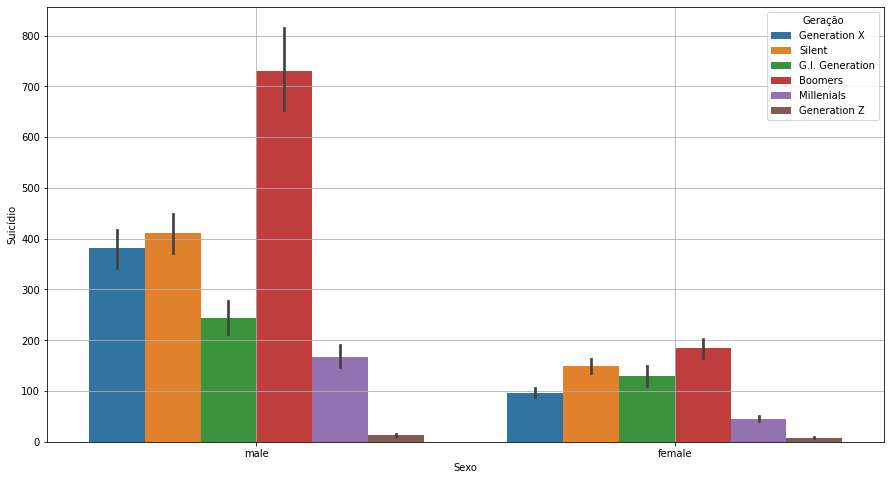

In [ ]:
# Gráfico de barras mostrando os casos de suicídio por sexo
plt.figure(figsize=(15,8))
sns.barplot(x=df['Sexo'], y=df['Suicídio'], hue=df['Geração'])
plt.grid('true')

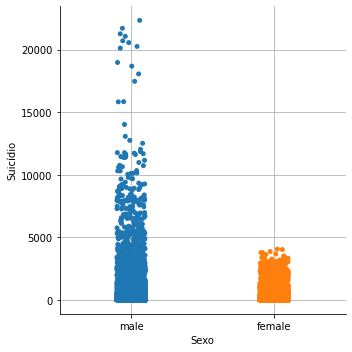

In [ ]:
#Visão geral de casos separados entre sexo, sem considerar a geração
sns.catplot(x='Sexo',  y='Suicídio', data=(df))
plt.grid('true')

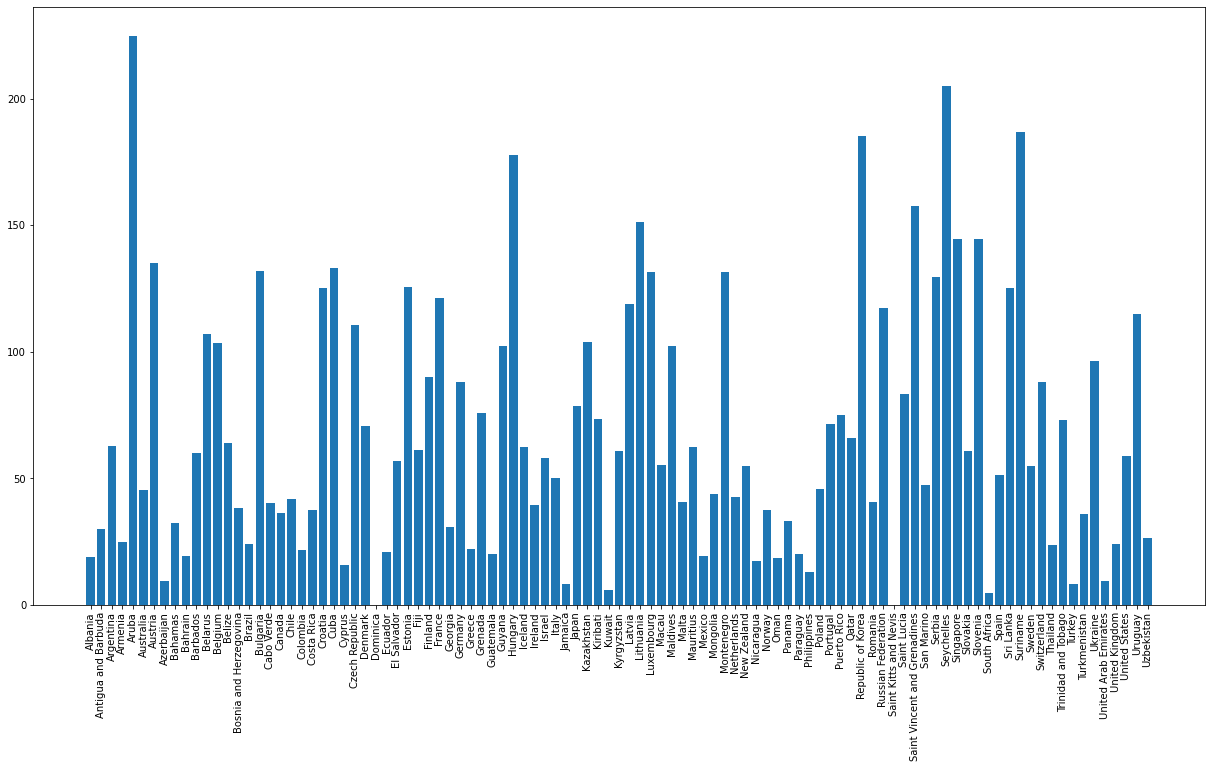

In [ ]:
# casos (casos/população de 100k) de suicídios por países

plt.figure(figsize=(21,11))
plt.bar(df['País'], df['S p/ 100k H'])
plt.xticks(rotation=90);

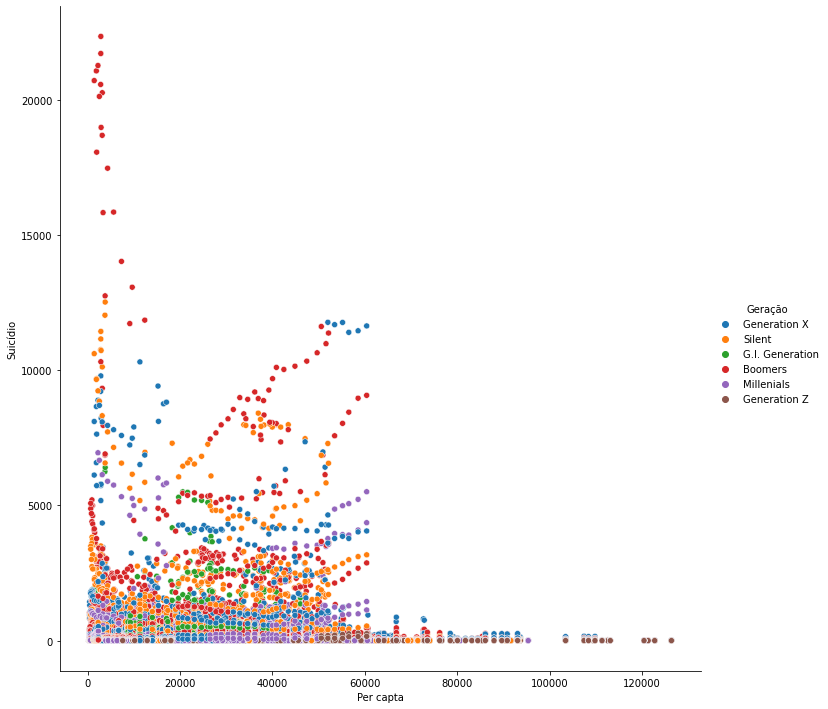

In [ ]:
# Nesse caso, estamos tentando enteder se há uma relação entre os vários tipos de dados com a taxa de suicídio existente.
# O gráfico abaixo mostra os casos de suicídios por renda per capita de cada país.
# com a legenda sendo a geração

sns.pairplot(x_vars='Per capta',y_vars='Suicídio',data=df, height=10,hue='Geração')

# 3º Passo: Previsão de dados usando ML

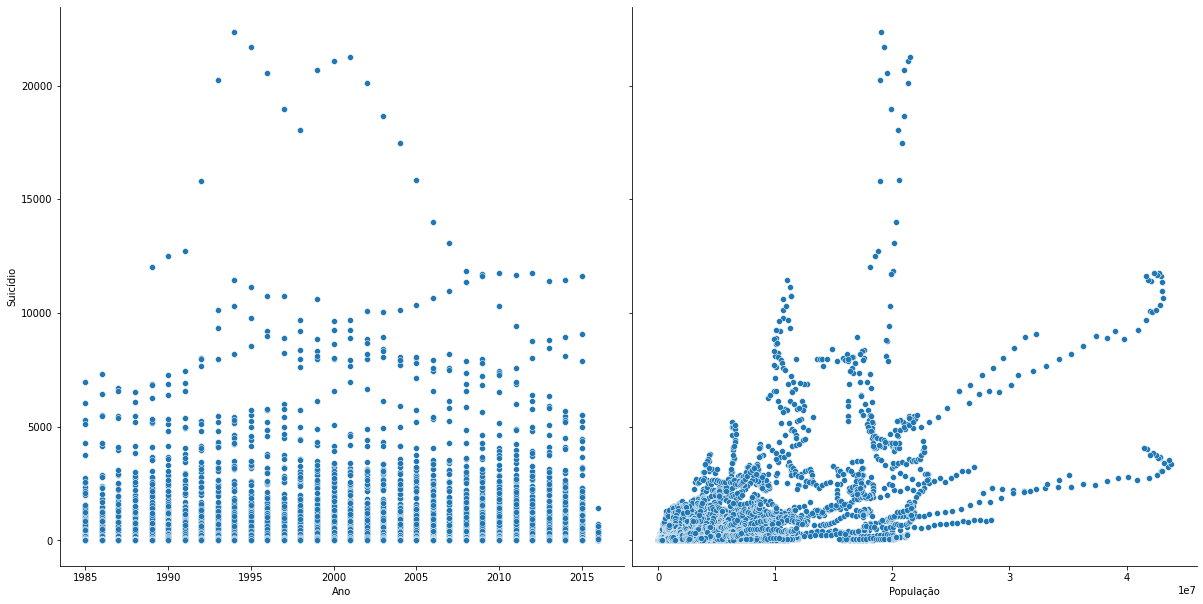

In [ ]:
# Após uma breve visualização de dados é necessário que usemos gráficos para entender as relações entre os dados do dataset
# No gráfico abaixo podemos visulizar a distribuição de dados
# Podemos visualizar cada coluna com seu respectivo gráfico, através da visualização.
# Pode-se chegar a qual dado tem correlação a outro
# Grafico de Anos e População

sns.pairplot(x_vars=['Ano', 'População'], y_vars='Suicídio', data=df, height=8.5)

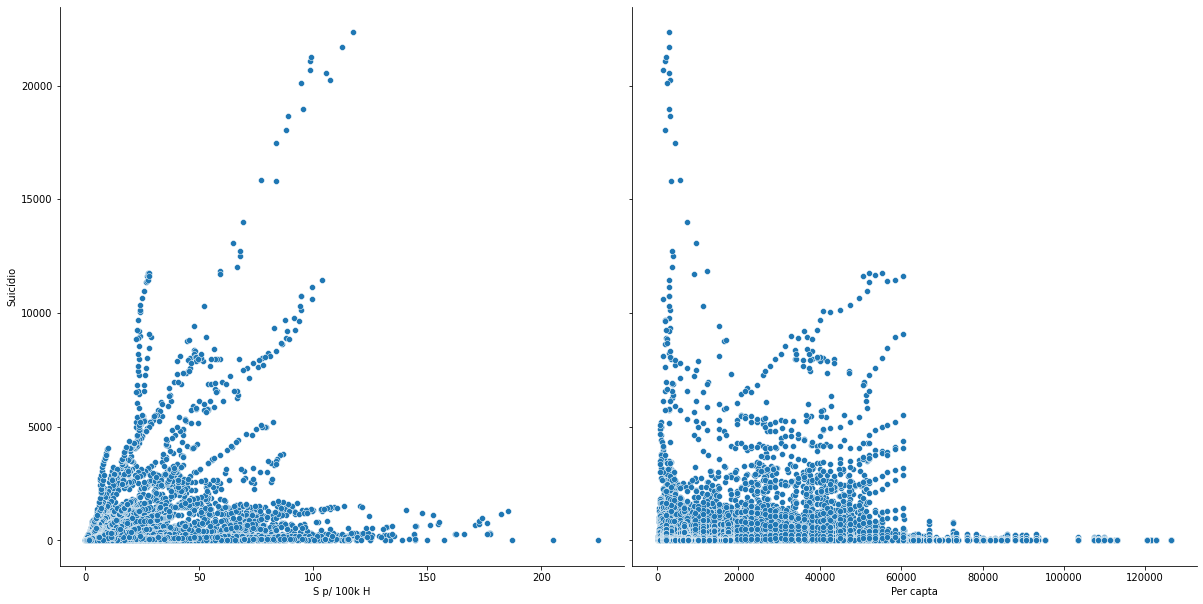

In [ ]:
#Gráfico de suicidio por 100k de habitantes e renda percapta
sns.pairplot(x_vars=['S p/ 100k H', 'Per capta'], y_vars='Suicídio', data=df, height=8.5)

In [ ]:
#utilizando o método corr para criar a matriz de correlação
df.corr()

,Ano,Suicídio,População,S p/ 100k H,Per capta
Ano,1.000000,-0.004546,0.008850,-0.039037,0.339134
Suicídio,-0.004546,1.000000,0.616162,0.306604,0.061330
População,0.008850,0.616162,1.000000,0.008285,0.081510
S p/ 100k H,-0.039037,0.306604,0.008285,1.000000,0.001785
Per capta,0.339134,0.061330,0.081510,0.001785,1.000000


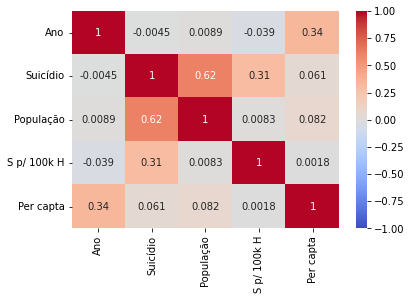

In [ ]:
#gráfico de calor com os valores da correlação entre as informações
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

In [ ]:
#Usando cada coluna para obter a correlação entre os dados da coluna e os casos de suicídio
#testando a correlação de outra forma
print(np.corrcoef(df['Ano'], df['Suicídio']))
print(np.corrcoef(df['População'], df['Suicídio']))
print(np.corrcoef(df['S p/ 100k H'], df['Suicídio']))
print(np.corrcoef(df['Per capta'], df['Suicídio']))


#  ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
#  ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
#  ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
#  ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
#  ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

[[ 1.         -0.00454596]
 [-0.00454596  1.        ]]
[[1.         0.61616227]
 [0.61616227 1.        ]]
[[1.         0.30660445]
 [0.30660445 1.        ]]
[[1.         0.06132975]
 [0.06132975 1.        ]]


In [ ]:
# Usando regressão linear para predizer a correlação entre os dados acima
r = LinearRegression()

In [ ]:
# Armazenando valores das colunas 4 e 5, Colunas suicídio e população respectivamente

Xv = df.iloc[:,5].values
yv = df.iloc[:,4].values

In [ ]:
## Atribuindo as variáveis armazenadas um array, para poder atribuí-los ao LinearRegression()

X = np.array([Xv])
y = np.array([yv])

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# ajuste dos dados processados ao modelo que estamos executando

r.fit(X, y)

LinearRegression()

In [ ]:
# previsão da taxa de suicídio usando método predict()

prev = r.predict(X)

In [ ]:
#Verifica a taxa de Score do modelo

r2_score(X, prev)

-0.22207153841382854

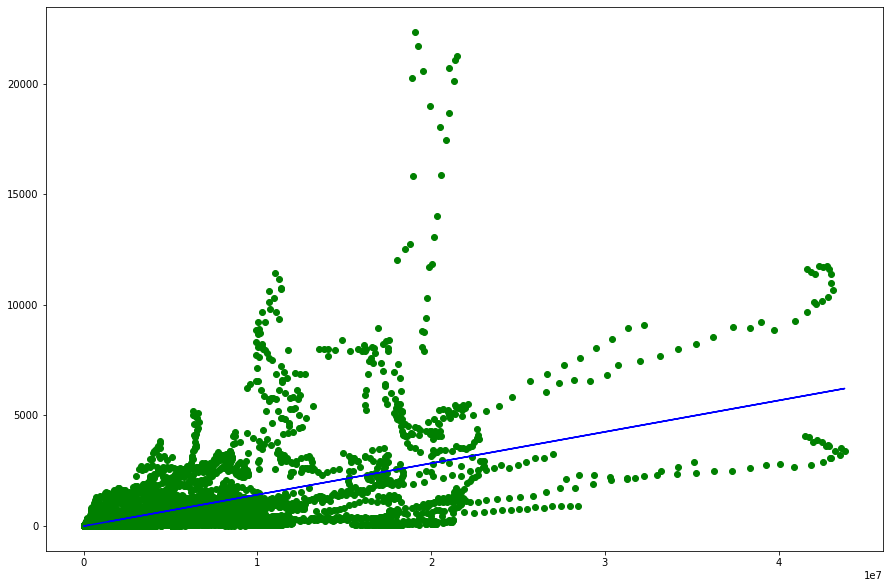

In [ ]:
# Gráfico mostra ML em execução, grafíco scatter mostra população em geral
# Gráfico azul em linhas mostra a previsão de casos de suicídio de acordo com a sua
# correlação entre a população
# Observa-se que a linha  azul está muito em baixo, poís sinaliza que a taxa de suicídio não irá ser tão alta


plt.figure(figsize=(15,10))
plt.scatter(X, y, color='green')
plt.plot(X, prev, color='blue')
plt.show()